# kramer2.0 Experiment 02: Figures
## Angelique I. Delarazan
### kramer2.0_experiment_02_vA5
### Retrieval Tasks: Character-Cued Recall and Timeline Task

## Set Up

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import itertools
import ptitprince as pt


## Character-Cued Recall

In [4]:
recall = pd.read_csv('~/Box Sync/aidelarazan_box/Projects/kramer2.0/data/kramer2.0_vA5/kramer2.0_vA5_sub-all_desc-recall.csv')
recall['condition'] = recall['coherence'] + '_' + recall['lag']
print(recall.columns.tolist())
recall.head()

['subject', 'version', 'character', 'coherence', 'lag', 'plot', 'response', 'rt', 'stimulus', 'word_count', 'condition']


,subject,version,character,coherence,lag,plot,response,rt,stimulus,word_count,condition
0,401,3,Sandra,unrelated,short,sideplot,"{""Q0"":""Sandra was going on a blind date with a...",183742.3,NaN,87,unrelated_short
1,401,3,Beatrice,coherent,long,sideplot,"{""Q0"":""Beatrice was having trouble with her gi...",180485.3,NaN,123,coherent_long
2,401,3,Melvin,unrelated,long,sideplot,"{""Q0"":""Melvin Doyle is a friend of the main ch...",180831.0,NaN,93,unrelated_long
3,401,3,Johnny,coherent,short,sideplot,"{""Q0"":""Johnny Pratt is a friend of the main ch...",180413.7,NaN,78,coherent_short
4,401,3,Charles,mainplot,mainplot,mainplot,"{""Q0"":""Charles Bort is the main character of t...",365204.1,NaN,354,mainplot_mainplot


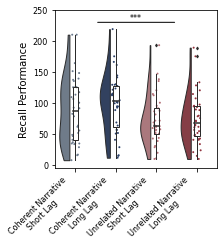

In [8]:
fig, ax = plt.subplots(figsize=(2.9, 2.9), facecolor='none')

xtick_order = ['coherent_short', 'coherent_long', 'unrelated_short', 'unrelated_long']
xtick_labels = {
    'coherent_short': 'Coherent Narrative\nShort Lag         ',
    'coherent_long': 'Coherent Narrative\nLong Lag         ',
    'unrelated_short': 'Unrelated Narrative\nShort Lag         ',
    'unrelated_long': 'Unrelated Narrative\nLong Lag         '
}
xtick_colors = {
    'coherent_short': '#6b7a8d',
    'coherent_long': '#2a3f67',
    'unrelated_short': '#b27077',
    'unrelated_long': '#91323d'
}

ax=pt.half_violinplot( 
    data=recall[recall['coherence']!='mainplot'], 
    x='condition', 
    y='word_count', 
    hue='condition',
    hue_order=xtick_order,
    palette = xtick_colors, 
    bw = .5, 
    cut = 0.,
    scale = "area", 
    width = .5, 
    inner = None,
    order = xtick_order, 
    split=True,
    linewidth=1,
    # orient = ort
    )

ax=sns.boxplot( 
    data=recall[recall['coherence']!='mainplot'], 
    x='condition', 
    y='word_count', 
    palette = xtick_colors, 
    width = .14, 
    order = xtick_order,
    fliersize=2,
    zorder = 10,\
            showcaps = False, boxprops = {'facecolor':'none', "zorder":10, 'linewidth':1},\
            showfliers=True, whiskerprops = {'linewidth':1, "zorder":10},\
            #    saturation = 1, orient = ort
               )

ax=sns.stripplot( 
    data=recall[recall['coherence']!='mainplot'], 
    x='condition', 
    y='word_count', 
    palette = xtick_colors, 
    edgecolor = "white",
    size = 2, 
    jitter = 1, 
    zorder = 0,
    order = xtick_order,
    # orient = ort
    )

ax.set_ylabel('Recall Performance')
ax.set_xlabel('')
ax.set_xticks(range(len(xtick_order)))
ax.set_xticklabels([xtick_labels[label] for label in xtick_order], rotation=45, ha='right')

xy = (0.5, 230)
xytext = (2.5, 230)
center = ((xy[0] + xytext[0]) / 2, (xy[1] + xytext[1]) / 2)

ax.annotate('', xy=xy, xytext=xytext, arrowprops=dict(arrowstyle='-', color='black'))
ax.text(center[0], center[1] + 15, '***', ha='center', va='top', fontsize=8)
ax.set_ylim(-5, 250)  
ax.tick_params(labelsize=8)
ax.legend_.remove()

# plt.savefig('/Users/aidelarazan/Box Sync/aidelarazan_box/Projects/kramer2.0/figures/updated_figures_03.09.2024/kramer2.0_vA5_recall_performance_vertical_raincloud.png', dpi=300, bbox_inches='tight')

## Timeline Task

In [9]:
timeline = pd.read_csv('~/Box Sync/aidelarazan_box/Projects/kramer2.0/data/kramer2.0_vA5/kramer2.0_vA5_sub-all_desc-timeline.csv')
timeline['condition'] = timeline['coherence'] + '_' + timeline['lag']
timeline = timeline[timeline['exclusion']=='include']
print(timeline.columns.tolist())
timeline.head()

['subject', 'version', 'character', 'act', 'event', 'position', 'coherence', 'lag', 'plot', 'response', 'rt', 'error', 'abs_error', 'condition', 'exclusion']


,subject,version,character,act,event,position,coherence,lag,plot,response,rt,error,abs_error,condition,exclusion
2,401,3,Charles,1,A,1,mainplot,mainplot,mainplot,73.0,7473.4,72.0,72.0,mainplot_mainplot,include
5,401,3,Charles,1,D,52,mainplot,mainplot,mainplot,62.0,2287.2,10.0,10.0,mainplot_mainplot,include
6,401,3,Johnny,1,A,58,coherent,short,sideplot,94.0,4923.2,36.0,36.0,coherent_short,include
7,401,3,Beatrice,2,A,120,coherent,long,sideplot,123.0,2907.9,3.0,3.0,coherent_long,include
8,401,3,Charles,1,A,2,mainplot,mainplot,mainplot,64.0,3052.3,62.0,62.0,mainplot_mainplot,include


In [10]:
timeline = timeline[timeline['coherence']!='mainplot'].groupby(['subject', 'coherence', 'lag', 'condition']).mean().reset_index()

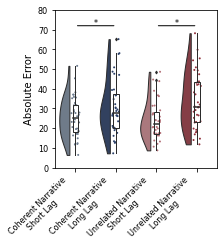

In [13]:
fig, ax = plt.subplots(figsize=(2.9, 2.9), facecolor='none')

xtick_order = ['coherent_short', 'coherent_long', 'unrelated_short', 'unrelated_long']
xtick_labels = {
    'coherent_short': 'Coherent Narrative\nShort Lag         ',
    'coherent_long': 'Coherent Narrative\nLong Lag         ',
    'unrelated_short': 'Unrelated Narrative\nShort Lag         ',
    'unrelated_long': 'Unrelated Narrative\nLong Lag         '
}
xtick_colors = {
    'coherent_short': '#6b7a8d',
    'coherent_long': '#2a3f67',
    'unrelated_short': '#b27077',
    'unrelated_long': '#91323d'
}

ax=pt.half_violinplot( 
    data=timeline[timeline['coherence']!='mainplot'], 
    x='condition', 
    y='abs_error', 
    hue='condition',
    hue_order=xtick_order,
    palette = xtick_colors, 
    bw = .5, 
    cut = 0.,
    scale = "area", 
    width = .5, 
    inner = None,
    order = xtick_order, 
    split=True,
    linewidth=1,
    # orient = ort
    )

ax=sns.boxplot( 
    data=timeline[timeline['coherence']!='mainplot'], 
    x='condition', 
    y='abs_error', 
    palette = xtick_colors, 
    width = .14, 
    order = xtick_order,
    fliersize=2,
    zorder = 10,\
            showcaps = False, boxprops = {'facecolor':'none', "zorder":10, 'linewidth':1},\
            showfliers=True, whiskerprops = {'linewidth':1, "zorder":10},\
            #    saturation = 1, orient = ort
               )

ax=sns.stripplot( 
    data=timeline[timeline['coherence']!='mainplot'], 
    x='condition', 
    y='abs_error', 
    palette = xtick_colors, 
    edgecolor = "white",
    size = 2, 
    jitter = 1, 
    zorder = 0,
    order = xtick_order,
    # orient = ort
    )

ax.set_ylabel('Absolute Error')
ax.set_xlabel('')
ax.set_xticks(range(len(xtick_order)))
ax.set_xticklabels([xtick_labels[label] for label in xtick_order], rotation=45, ha='right')

xy_A = (0, 72)
xytext_A = (1, 72)
center_A = ((xy_A[0] + xytext_A[0]) / 2, (xy_A[1] + xytext_A[1]) / 2)

ax.annotate('', xy=xy_A, xytext=xytext_A, arrowprops=dict(arrowstyle='-', color='black'))
ax.text(center_A[0], center_A[1] + 4, '*', ha='center', va='top', fontsize=8)

xy_B = (2, 72)
xytext_B = (3, 72)
center_B = ((xy_B[0] + xytext_B[0]) / 2, (xy_B[1] + xytext_B[1]) / 2)

ax.annotate('', xy=xy_B, xytext=xytext_B, arrowprops=dict(arrowstyle='-', color='black'))
ax.text(center_B[0], center_A[1] + 4, '*', ha='center', va='top', fontsize=8)

ax.set_ylim(0, 80)  
ax.tick_params(labelsize=8)
ax.legend_.remove()


# plt.savefig('/Users/aidelarazan/Box Sync/aidelarazan_box/Projects/kramer2.0/figures/updated_figures_03.09.2024/kramer2.0_vA5_timeline_task_abs_vertical_raincloud.png', dpi=300, bbox_inches='tight')

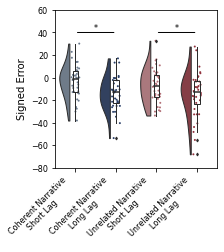

In [14]:
fig, ax = plt.subplots(figsize=(2.9, 2.9), facecolor='none')

xtick_order = ['coherent_short', 'coherent_long', 'unrelated_short', 'unrelated_long']
xtick_labels = {
    'coherent_short': 'Coherent Narrative\nShort Lag         ',
    'coherent_long': 'Coherent Narrative\nLong Lag         ',
    'unrelated_short': 'Unrelated Narrative\nShort Lag         ',
    'unrelated_long': 'Unrelated Narrative\nLong Lag         '
}
xtick_colors = {
    'coherent_short': '#6b7a8d',
    'coherent_long': '#2a3f67',
    'unrelated_short': '#b27077',
    'unrelated_long': '#91323d'
}

ax=pt.half_violinplot( 
    data=timeline[timeline['coherence']!='mainplot'], 
    x='condition', 
    y='error', 
    hue='condition',
    hue_order=xtick_order,
    palette = xtick_colors, 
    bw = .5, 
    cut = 0.,
    scale = "area", 
    width = .5, 
    inner = None,
    order = xtick_order, 
    split=True,
    linewidth=1,
    # orient = ort
    )

ax=sns.boxplot( 
    data=timeline[timeline['coherence']!='mainplot'], 
    x='condition', 
    y='error', 
    palette = xtick_colors, 
    width = .14, 
    order = xtick_order,
    fliersize=2,
    zorder = 10,\
            showcaps = False, boxprops = {'facecolor':'none', "zorder":10, 'linewidth':1},\
            showfliers=True, whiskerprops = {'linewidth':1, "zorder":10},\
            #    saturation = 1, orient = ort
               )

ax=sns.stripplot( 
    data=timeline[timeline['coherence']!='mainplot'], 
    x='condition', 
    y='error', 
    palette = xtick_colors, 
    edgecolor = "white",
    size = 2, 
    jitter = 1, 
    zorder = 0,
    order = xtick_order,
    # orient = ort
    )

ax.set_ylabel('Signed Error')
ax.set_xlabel('')
ax.set_xticks(range(len(xtick_order)))
ax.set_xticklabels([xtick_labels[label] for label in xtick_order], rotation=45, ha='right')

xy_A = (0, 40)
xytext_A = (1, 40)
center_A = ((xy_A[0] + xytext_A[0]) / 2, (xy_A[1] + xytext_A[1]) / 2)

ax.annotate('', xy=xy_A, xytext=xytext_A, arrowprops=dict(arrowstyle='-', color='black'))
ax.text(center_A[0], center_A[1] + 8, '*', ha='center', va='top', fontsize=8)

xy_B = (2, 40)
xytext_B = (3, 40)
center_B = ((xy_B[0] + xytext_B[0]) / 2, (xy_B[1] + xytext_B[1]) / 2)

ax.annotate('', xy=xy_B, xytext=xytext_B, arrowprops=dict(arrowstyle='-', color='black'))
ax.text(center_B[0], center_A[1] + 8, '*', ha='center', va='top', fontsize=8)
ax.set_ylim(-80, 60)  
ax.tick_params(labelsize=8)
ax.legend_.remove()


# plt.savefig('/Users/aidelarazan/Box Sync/aidelarazan_box/Projects/kramer2.0/figures/updated_figures_03.09.2024/kramer2.0_vA5_timeline_task_signed_vertical_raincloud.png', dpi=300, bbox_inches='tight')